# GRIP2021 - Data Science & Business Analytics
## Task- 1
## Student's marks prediction using Supervised Learning

#### Importing important libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Fecthing data with the help of pandas


In [4]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

df1 = pd.read_csv(url)
df1.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Exploring the dataset

In [16]:
df1.shape

(25, 2)

In [17]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [18]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In the dataset, we only have two variables. Here we will take "Hours" as a feature and "Scores" as a label.

#### Ploting the relation between 'Hours' and 'Scores'


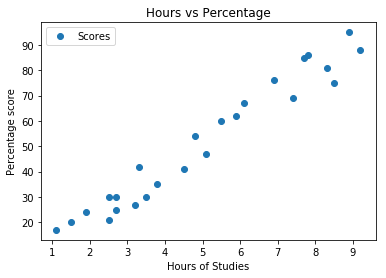

In [5]:
df1.plot(x="Hours", y="Scores", style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of Studies')
plt.ylabel('Percentage score')
plt.show()


Here we can see, Hours and Score are in linear relation. Both's values are changing linearly according to the following graph.

#### Dividing the dataset into features and lables

In [6]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 1].values


#### Splitting the data for training and testing purpose

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Using linear regression algorithm from Scikit-learn library 

After creating linear regression object, let's try to fit our training data and train our model.

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training successfull!")

Training successfull!


### Creating a fitting curve for actual and predicted data 

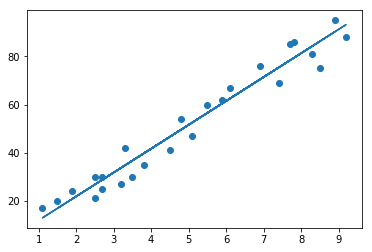

In [9]:
line = regressor.coef_*X+ regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()


#### Testing the model

In [14]:
X_test
print(X_test.shape)
y_pred = regressor.predict(X_test)
print(y_pred)

(5, 1)
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Comparing the actual and predicted values


In [11]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Here, you can see that predicted values are not so much accurate, we have small diffrence.
Having less amount of training data for the model can be a big reason of diffrence.

### Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
hours = 9.25
y_predict = regressor.predict(hours)
print("Predicted_score: ", y_predict)

Predicted_score:  [93.69173249]


#### Evaluating the model


In [13]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002975


We can still our improve our model by adding more training data to the dataset.